In [1]:
#website UI and conspiracy theory classifier


# TF-IDF (can try )
#add / separate data (url useless , separate words)
# try break urls e.g. https:\/\/www.zerohedge.com muight be conspiracy theory
# tokenizer for sklearn before tfidf
# concat the features into 1 set, instead of many features.
# split into multiple trainign samples. 1 long para , split into eg 20 samples for training.

# apply classifier to all sentences in the whole doc, is it 50%> is conspiracy (consistency) even if the article is conspiracy? find accuracy.

#highlight where things ai thinks that are consp, 

#may experiment with chatgpt test if gives useful answers

#if does, api ..to json to user interface

#maybe heatmap visualisation

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_json('yt_training_set.json')

df = pd.DataFrame(df)
print(df)

                                                         title  \
60Bp0qJvvqA  The Second Book of Enoch (Human Voice, Read-Al...   
KP6SZFQUDTs  Pastor David Lynn Schools a Muslim On Isaiah 4...   
SOpvCubaIx0  Obama's Best Comebacks and Rebuttal Moments - ...   
Cb1EDmVtg5M  BLACK MAN in a MAGA Hat & American Exceptional...   
P3hY1eagq88                       Reagan Warned Us About Obama   
...                                                        ...   
6Ib-K5nf_Ag        Chair Pulling Pranks (Gone Wrong) - 2018 !!   
-7SsM4Q69Yo  Firefighters Laugh At Inappropriate Moments (E...   
rXj6MMurcOk  Joshua Kutuny: Aaron Cheruiyot is not aware of...   
lDbW2PpuOPM  The Wandering Trader Update is BAD... so we ch...   
GvF2fIKik-M  Hurricane Dorian Scenarios: Breaking Down Stor...   

                   channel_title  view_count  \
60Bp0qJvvqA      Apocryphile1970   1051238.0   
KP6SZFQUDTs           SOCO Films   1145750.0   
SOpvCubaIx0         Epic Moments   1086910.0   
Cb1EDmVtg5M    

In [3]:
headers = df.keys()
print(headers)

Index(['title', 'channel_title', 'view_count', 'tags', 'description', 'label'], dtype='object')


In [7]:


# Specify the columns (categories) from which you want to drop rows with missing values
columns_to_dropna = ["title", "channel_title", "view_count", "tags", "description", "label"]

# Use the dropna method with how='any' to drop rows with missing values from the specified columns
filtered_data = df.dropna(subset=columns_to_dropna, how='any')

# print(filtered_data)
new_df=pd.DataFrame(filtered_data)



new_dataframe= pd.DataFrame({'title': new_df["title"].values,"channel_title": new_df["channel_title"].values,"view_count":new_df["view_count"].values,"tags":new_df["tags"].values,"description":new_df["description"].values,'label': new_df["label"].values})
print(new_dataframe)

                                                 title  \
0    The Second Book of Enoch (Human Voice, Read-Al...   
1    Obama's Best Comebacks and Rebuttal Moments - ...   
2    BLACK MAN in a MAGA Hat & American Exceptional...   
3                         Reagan Warned Us About Obama   
4    TRUMP'S SECRET PLAN: HOW THE GOVT SHUTDOWN IS ...   
..                                                 ...   
993        Chair Pulling Pranks (Gone Wrong) - 2018 !!   
994  Firefighters Laugh At Inappropriate Moments (E...   
995  Joshua Kutuny: Aaron Cheruiyot is not aware of...   
996  The Wandering Trader Update is BAD... so we ch...   
997  Hurricane Dorian Scenarios: Breaking Down Stor...   

               channel_title  view_count  \
0            Apocryphile1970   1051238.0   
1               Epic Moments   1086910.0   
2            Y.G. NYGHTSTORM    873200.0   
3                Calvin King  19999350.0   
4    The Josh Bernstein Show    825281.0   
..                       ...         ..

['The Second Book of Enoch (Human Voice, Read-Along Version) Obama\'s Best Comebacks and Rebuttal Moments - Part 2 BLACK MAN in a MAGA Hat & American Exceptionalism #WalkAway pt  2 #TRUMP2020 Reagan Warned Us About Obama TRUMP\'S SECRET PLAN: HOW THE GOVT SHUTDOWN IS RAPIDLY DRAINING THE SWAMP Glenn Beck Presents: The Democrats’ Hydra Roger Stone Reveals All After Court Appearance GHWB Poppy Bush funeral Notes | Pence a Straight Arrow? Americans Forced To Comply By 2020—No Compliance, No Entry and The Bill Already Passed Russia Collusion Peddlers Will Turn on Each Other—Trump 2020 Adviser Steven Rogers THIS IS THE MOST POWERFUL ARGUMENT I HAVE HEARD AGAINST SANCTUARY CITIES IN AMERICA. Migrant Caravan: Will Trump Stop It? America\'s 60 Greatest Unsolved Mysteries & Crimes (E8, S1) World War I - summary of the "Great War" Yogis Of Tibet - Documentary - The Truth in The Dharma What is China’s Grand Strategy? 9-Ton Slab of Glass Found in the Cave of Beit Shearim Film Theory: Why You SHOUL

In [17]:

X=concat_sample


# The 'label' column contains the target labels
y = new_dataframe['label']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

ValueError: Found input variables with inconsistent numbers of samples: [1, 998]

In [7]:
# Check for NaN values in X_train and y_train

has_nan = np.isnan(X_test).any() 

if has_nan:
    print("NaN in xtrain exists .")

In [8]:
print(X_train)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.06240833 0.03508806]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.28351871 0.         0.11946761]]


In [39]:
# consp_classifier = LogisticRegression()
consp_classifier = MultinomialNB()

#classifier training
consp_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=300, random_state=38)

Accuracy: 0.715
Precision: 0.8
Recall: 0.5882352941176471
F1 Score: 0.6779661016949153
ROC-AUC: 0.7730092036814726


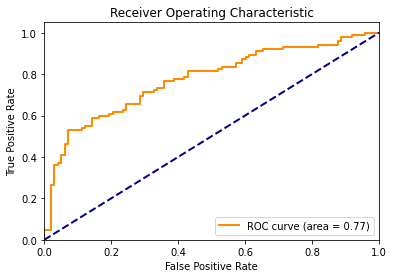

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt



y_pred = consp_classifier.predict(X_test)
# performance metrics: 
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# ROC-AUC score
roc_auc = roc_auc_score(y_test, consp_classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC: {roc_auc}")

# Plot ROC curve
fp, tp, thresholds = roc_curve(y_test, consp_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fp, tp)

plt.figure()
plt.plot(
        fp, 
        tp, 
        color='darkorange',
        lw=2, 
        label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [41]:
import joblib

# Save the TF-IDF vectorizer model
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

# Save the model
joblib.dump(consp_classifier, 'consp_classifier.joblib')



['consp_classifier.joblib']

In [34]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
}

# Create a grid search
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # You can change the scoring metric as needed
    n_jobs=-1,  # Use all available CPU cores for faster searching
)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found during the search
best_params = grid_search.best_params_

# Train a RandomForestClassifier with the best hyperparameters
best_consp_classifier = RandomForestClassifier(random_state=42, **best_params)
best_consp_classifier.fit(X_train, y_train)

# Predict on the test set using the best classifier
y_pred = best_consp_classifier.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_consp_classifier.predict_proba(X_test)[:, 1])

print("Best Hyperparameters:", best_params)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC: {roc_auc}")




Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 0.72
Precision: 0.8194444444444444
Recall: 0.5784313725490197
F1 Score: 0.67816091954023
ROC-AUC: 0.7811124449779911
